<a href="https://colab.research.google.com/github/shubhkhandare/Brain-Tumor-Detection-with-VGG16/blob/main/brainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical,plot_model

import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /archive (2).zip
!ls /archive (2).zip


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ln -s /content/gdrive/My\ Drive/ /archive (2).zip'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ls /archive (2).zip'


In [7]:
!unzip "/content/gdrive/MyDrive/archive (2).zip"

Archive:  /content/gdrive/MyDrive/archive (2).zip
replace Testing/glioma/Te-glTr_0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [14]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Training',
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical" )

validation_generator = validation_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(224, 224),
    batch_size=64,
class_mode="categorical")


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:

input_shape = (224, 224, 3)

vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)

vgg16_base.trainable = False


model = Sequential()
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])



58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21138500 (80.64 MB)
Trainable params: 6423812 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [27]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 22.2 MB/s eta 0:00:00


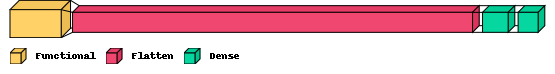

In [28]:
from visualkeras import layered_view

# Visualize the model
layered_view(model, legend=True, max_xy=300)


In [16]:

nb_train_samples= 5712
nb_validation_samples= 1311
epochs= 30
batch_size= 64

history= model.fit(train_generator,
                   steps_per_epoch= nb_train_samples//batch_size,
                   epochs= epochs,
                   validation_data= validation_generator,
                   validation_steps= nb_validation_samples//batch_size,
                    shuffle= True)

Epoch 1/30
89/89 [==============================] - 106s 1s/step - loss: 0.5421 - accuracy: 0.7888 - val_loss: 0.4154 - val_accuracy: 0.8523
Epoch 2/30
89/89 [==============================] - 91s 1s/step - loss: 0.3171 - accuracy: 0.8853 - val_loss: 0.3397 - val_accuracy: 0.8750
Epoch 3/30
89/89 [==============================] - 91s 1s/step - loss: 0.2549 - accuracy: 0.9102 - val_loss: 0.2717 - val_accuracy: 0.8992
Epoch 4/30
89/89 [==============================] - 97s 1s/step - loss: 0.2022 - accuracy: 0.9309 - val_loss: 0.2499 - val_accuracy: 0.9016
Epoch 5/30
89/89 [==============================] - 94s 1s/step - loss: 0.1794 - accuracy: 0.9394 - val_loss: 0.2282 - val_accuracy: 0.9109
Epoch 6/30
89/89 [==============================] - 92s 1s/step - loss: 0.1571 - accuracy: 0.9478 - val_loss: 0.1879 - val_accuracy: 0.9328
Epoch 7/30
89/89 [==============================] - 92s 1s/step - loss: 0.1712 - accuracy: 0.9384 - val_loss: 0.2237 - val_accuracy: 0.9187
Epoch 8/30
89/89 [=

In [17]:
model_evaluation= model.evaluate(validation_generator, batch_size = batch_size)


21/21 [==============================] - 12s 573ms/step - loss: 0.0866 - accuracy: 0.9764


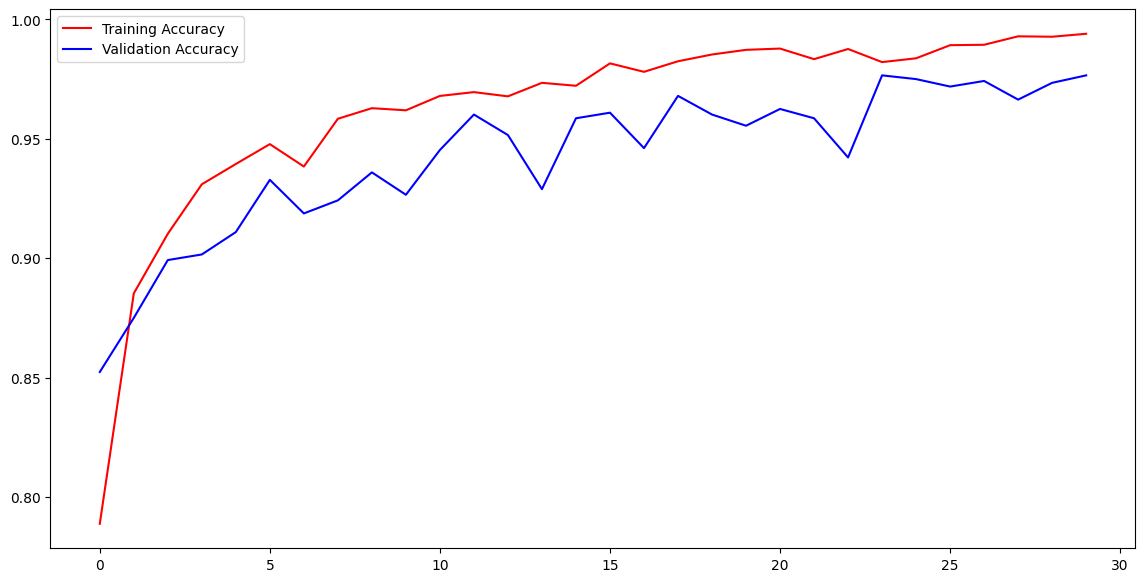

In [18]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [21]:
import cv2

In [23]:
img = cv2.imread('/content/Testing/notumor/Te-noTr_0000.jpg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array = img_array.reshape(1,224,224,3)
a=model.predict(img_array)

1/1 [==============================] - 1s 1s/step


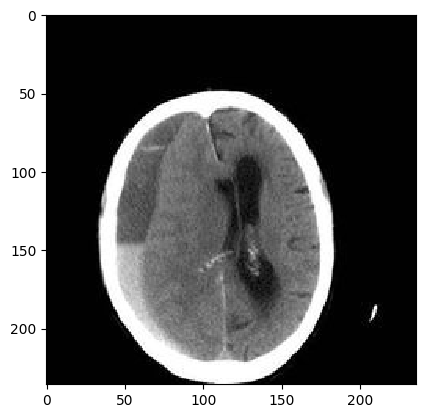

In [24]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Testing/notumor/Te-noTr_0000.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [25]:
a=model.predict(img_array)
indices = a.argmax()


if indices==0:
    indices="The image is glima Tumor"
elif indices==1:
    indices="The image is meningioma Tumor"
elif indices==2:
    indices="The image is No Tumor"
else:
    indices="The image is pituitary tumor"

print(indices)


1/1 [==============================] - 0s 20ms/step
The image is No Tumor
